In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from keras import layers 
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt 


In [2]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [3]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

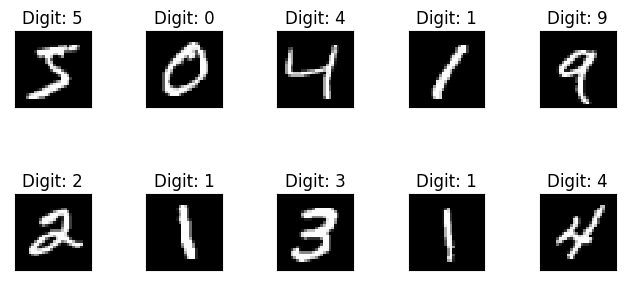

In [5]:
for i in range(10):

    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.yticks([])
    plt.xticks([])

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Text(0.5, 1.0, 'Digit: 5')

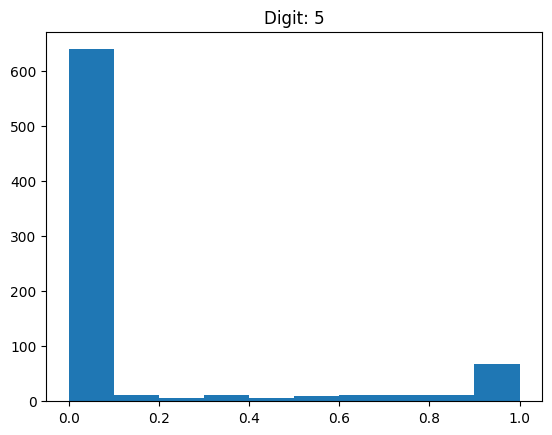

In [8]:
plt.hist(X_train[0])
plt.title("Digit: {}".format(y_train[0]))

Text(0.5, 1.0, 'Digit: 4')

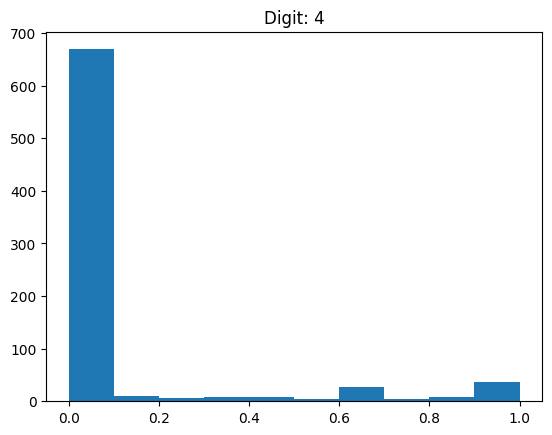

In [9]:
plt.hist(X_train[2])
plt.title("Digit: {}".format(y_train[2]))

In [10]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [11]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)

In [12]:
for i in range(5):
   print (Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
Y_test = np_utils.to_categorical(y_test, n_classes)
history = model.fit(X_train, Y_train,
   batch_size=128, epochs=20,
   verbose=2,
   validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 6s - loss: 0.2499 - accuracy: 0.9251 - val_loss: 0.1164 - val_accuracy: 0.9627 - 6s/epoch - 13ms/step
Epoch 2/20
469/469 - 3s - loss: 0.1004 - accuracy: 0.9686 - val_loss: 0.0899 - val_accuracy: 0.9707 - 3s/epoch - 6ms/step
Epoch 3/20
469/469 - 3s - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0732 - val_accuracy: 0.9776 - 3s/epoch - 6ms/step
Epoch 4/20
469/469 - 3s - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0648 - val_accuracy: 0.9793 - 3s/epoch - 6ms/step
Epoch 5/20
469/469 - 3s - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0674 - val_accuracy: 0.9796 - 3s/epoch - 6ms/step
Epoch 6/20
469/469 - 3s - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0659 - val_accuracy: 0.9815 - 3s/epoch - 6ms/step
Epoch 7/20
469/469 - 3s - loss: 0.0361 - accuracy: 0.9877 - val_loss: 0.0604 - val_accuracy: 0.9826 - 3s/epoch - 6ms/step
Epoch 8/20
469/469 - 3s - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0717 - val_accuracy: 0.9807 - 3s/epoch - 6ms/step
Epoch 9/20
469/469 - 3s

In [14]:
# To evaluate the model performance, we call evaluate method as follows −
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

#To evaluate the model performance, we call evaluate method as follows −
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

#We will print the loss and accuracy using the following two statements −
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0899 - accuracy: 0.9817 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.0899 - accuracy: 0.9817 - 2s/epoch - 5ms/step
Test Loss 0.089872807264328
Test Accuracy 0.9817000031471252


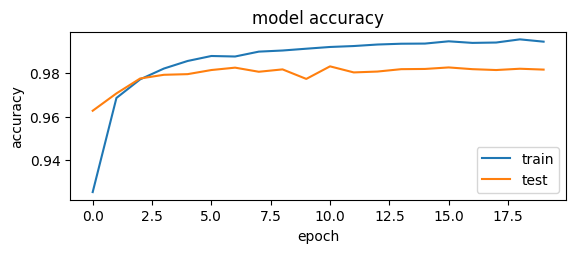

In [15]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

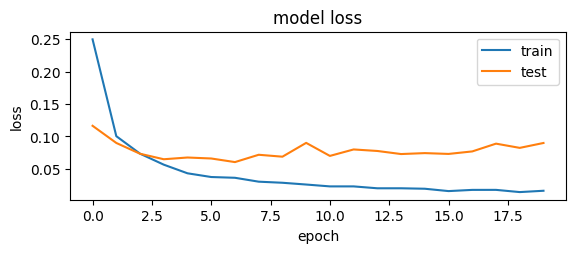

In [16]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [17]:
predictions = model.predict(X_test)
classes = np.argmax(predictions,axis = 1)
correct_predictions = np.nonzero(classes == y_test)[0]
incorrect_predictions = np.nonzero(classes != y_test)[0]
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

313/313 [==============================] - 2s 5ms/step
9817  classified correctly
183  classified incorrectly


#### *Save And Call Model
- directory = "./models/"
- name = 'handwrittendigitrecognition.h5'
- path = os.path.join(save_dir, name)
- model.save(path)
- print('Saved trained model at %s ' % path)
- model = load_model ('./models/handwrittendigitrecognition.h5')

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1

